In [1]:
import pandas as pd
from setfit import AbsaModel, AbsaTrainer, TrainingArguments

from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict, load_dataset
from transformers import EarlyStoppingCallback, TrainerCallback

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.utils import resample

from config.config import *
# from config.wandb import *

/Users/arina/GitProjects/amazon_corpus_documents_retrieval/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
model = AbsaModel.from_pretrained(
    "asadnaqvi/setfitabsa-aspect",
    "tomaarsen/setfit-absa-bge-small-en-v1.5-restaurants-polarity",
)
# Download from the 🤗 Hub
# model = AbsaModel.from_pretrained(
#     "omymble/setfit-absa-books-aspect",
#     "omymble/setfit-absa-books-polarity",
# )

/Users/arina/GitProjects/amazon_corpus_documents_retrieval/.venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/arina/GitProjects/amazon_corpus_documents_retrieval/.venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config_setfit.json:   0%|          | 0.00/109 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

/Users/arina/GitProjects/amazon_corpus_documents_retrieval/.venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
preds = model.predict("looking for advice from nabokov lovers... hey y'all, my department's annual \"book auction\" is coming up (faculty members sell books they no longer want to us broke grad students, basically)... and this year there is a huge selection of nabokov on the list of available books. i'm a lover of most classic literature, but haven't read any nabokov... so i was wondering if you experts might look at this list and tell me which few you think would be best for a nabokov-virgin? thanks in advance for any help, and here's the list i've got (sorry about the formatting, it's just a cut-n-paste). Vladimir Nabokov, Ada. Vladimir Nabokov, The Defense. Vladimir Nabokov, The Eye. Vladimir Nabokov, The Gift. Vladimir Nabokov, Invitation to a Beheading Vladimir Nabokov, King, Queen, Knave. Vladimir Nabokov, Laughter in the Dark. Vladimir Nabokov, Lectures on Don Quixote. Vladimir Nabokov, Lectures on Russian Literature. Vladimir Nabokov, Nabokov’s Quartet. Vladimir Nabokov, Pnin. Vladimir Nabokov, The Real Life of Sebastian Knight. Vladimir Nabokov, The Song of Igor’s Campaign. Vladimir Nabokov, Spring in Fialta.")

In [18]:
preds

[{'span': 'lovers', 'polarity': 'positive'},
 {'span': 'book auction', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Beheading Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Lectures', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Lectures', 'polarity': 'positive'},
 {'span': 'Russian Literature', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov', 'polarity': 'positive'},
 {'span': 'Sebastian Knight', 'polarity': 'positive'},
 {'span': 'Vladimir Nabokov'

In [19]:
preds = model.predict(["From a historical scholarly perspective, \"Why Jesus?\". I've been doing a lot of reading on early Christianity, say AD 30-200. I have learned that there were A LOT of itinerant apocalyptic type preachers in that day. Many people were referred to as \"Son of Man\". People ascribed powers to lots of wandering magicians and mystics, and \"raising people from the dead\" was not as uncommon as it seems to be today. So the question that I am looking to answer, (extra-biblically, not from a faith perspective) is, \"Why Jesus?\" Why not Appolonius of Tyana, or any of many other preacher types that proposed and preached in a similar fashion. Was it Paul's zeal? James'? The fact that Christianity demanded monotheism and other gods didn't mind if you held to previous divine allegiances? Can anyone recommend some books that tackle this question, and compare Jesus' ministry directly with his contemporaries? Thanks for any books you can point out.....",
"Schumann Biography. Does anyone have a recommendation for a biography of Robert Schumann? Thanks!",
"Which LISP? It'll be time for me to shake things up and learn a new language soon. I had started on Erlang a while back and getting back to it might be fun. But I'm starting to lean toward Lisp--probably Common Lisp rather than Scheme. Anyone care to recommend a good first Lisp book? Would I be crazy to hope that there's one out there with an emphasis on using Lisp in a web development and/or system administration context? Not that I'm unhappy with PHP and Perl, but the best way for me to find the time to learn a new language is to use it for my work..."
])

In [20]:
preds

[[],
 [{'span': 'Schumann Biography', 'polarity': 'positive'},
  {'span': 'biography', 'polarity': 'positive'},
  {'span': 'Robert Schumann', 'polarity': 'positive'}],
 [{'span': 'LISP', 'polarity': 'neutral'},
  {'span': 'language', 'polarity': 'neutral'},
  {'span': 'Erlang', 'polarity': 'neutral'},
  {'span': 'Lisp', 'polarity': 'neutral'},
  {'span': 'Common Lisp', 'polarity': 'neutral'},
  {'span': 'Scheme', 'polarity': 'neutral'},
  {'span': 'Lisp book', 'polarity': 'neutral'},
  {'span': 'Lisp', 'polarity': 'neutral'},
  {'span': 'web development', 'polarity': 'neutral'},
  {'span': 'system administration context', 'polarity': 'neutral'},
  {'span': 'PHP', 'polarity': 'neutral'},
  {'span': 'Perl', 'polarity': 'neutral'},
  {'span': 'language', 'polarity': 'neutral'},
  {'span': 'work', 'polarity': 'neutral'}],
 [{'span': 'LISP', 'polarity': 'neutral'},
  {'span': 'language', 'polarity': 'neutral'},
  {'span': 'Erlang', 'polarity': 'neutral'},
  {'span': 'Lisp', 'polarity': 'neu

In [21]:
preds1 = model.predict([
    "The best English translation of Iliad. Hello-hello. I have been looking for a good translation of Homer 's  Iliad  in verse. I have one by Robert Fitzgerald, but I don't find it completely satisfactory. I know there are a lot of English translations of  Iliad  , and I would love to hear your opinion on which one is the best :)",
    "text on Philippine history? I have an \"e-friend\" from Ireland, and he wants to be able to match my attempts in learning Irish history by learning about Philippine history. For someone who has little to no knowledge about the Philippines, what text would you recommend as a starter? I'm thinking something that starts \"from the beginning,\" whatever that means in historiographical terms...",
    "Peter I. I am new to LibraryThing. I'm very fond of reading Russian novels and poetry, but more recently I am going further into Russian history. I've just finished   Peter the Great   by Troyat , and am now reading   Peter the Great   by Klyuchevsky . I have   Peter the Great   by Massie , but was wondering whether that's the next logical step. Is there a better treatment of the subject? Does anyone have any other recommendations? Thank you.",
    "Catholic Breviary. Hello everyone! Can anyone recommend, or tell me where to find, a good Catholic breviary that isn't too expensive? Recently I've begun to pray the Liturgy of the Hours with a few of my friends and I would really like to have my own breviary. I looked on Amazon but I don't know how to pick one, and many of them are very expensive. Can anyone recommend a good breviary to me? Thanks! Peace, Stacey",
    "Irish Courses. Hello all. I was wondering if anyone had any recommendations for Irish study tools. I have Pimsleur’s Irish audio program, which I have found to be useful, but not perfect. I see that many of us in this group have Diarmuid O Se ’s Irish: A Complete Course for Beginners , I have just begun to use it, and so far I find it good, but a little disorganized at times. I have explored the idea of attending a course for Adults in Ireland from Foras na Gaeilge , but recently they have only held weekly classes, not the daily week-long courses that I am told the have had in the past. Does anyone have any other suggestions? Thanks.",
])

In [22]:
preds1

[[{'span': 'translation', 'polarity': 'positive'},
  {'span': 'Iliad', 'polarity': 'positive'},
  {'span': 'translation', 'polarity': 'positive'},
  {'span': 'Iliad', 'polarity': 'positive'},
  {'span': 'Robert Fitzgerald', 'polarity': 'positive'},
  {'span': 'translations', 'polarity': 'positive'},
  {'span': 'Iliad', 'polarity': 'positive'},
  {'span': 'opinion', 'polarity': 'positive'}],
 [{'span': 'history', 'polarity': 'neutral'},
  {'span': 'e-friend', 'polarity': 'neutral'},
  {'span': 'Ireland', 'polarity': 'neutral'},
  {'span': 'history', 'polarity': 'neutral'},
  {'span': 'history', 'polarity': 'neutral'},
  {'span': 'knowledge', 'polarity': 'neutral'},
  {'span': 'Philippines', 'polarity': 'neutral'},
  {'span': 'terms', 'polarity': 'neutral'}],
 [{'span': 'novels', 'polarity': 'positive'},
  {'span': 'poetry', 'polarity': 'positive'}],
 [{'span': 'Breviary', 'polarity': 'positive'},
  {'span': 'breviary', 'polarity': 'positive'},
  {'span': 'Liturgy', 'polarity': 'positive

In [ ]:
# The training/eval dataset must have `text`, `span`, `polarity`, and `ordinal` columns
dataset = load_dataset("omymble/setfit-books-reviews")
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

args = TrainingArguments(
    output_dir="models",
    use_amp=True,
    batch_size=32,
    eval_steps=10,
    save_steps=10,
    load_best_model_at_end=True,
)

trainer = AbsaTrainer(
    model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
)
trainer.train()

# new setfit

In [2]:
setfit_cats = pd.read_pickle(os.path.join(OBTAINED_DATA, 'setfit_categories.pkl'))
setfit_cats.head()

,text,span,label,category,ordinal
0,The solution given here is fantastic and a bit...,book,positive,BOOK#GENERAL,0
1,This thought races through Arthur's mind as he...,Arthur,neutral,CONTENT#CHARACTERS,0
2,This thought races through Arthur's mind as he...,Mister Monday,neutral,BOOK#TITLE,0
3,Arthur is put through a rigorous test of brave...,Arthur,neutral,CONTENT#CHARACTERS,0
4,Arthur is put through a rigorous test of brave...,Mister Monday,negative,CONTENT#CHARACTERS,0


In [3]:
setfit_cats['category'].value_counts()

category
CONTENT#CHARACTERS    1204
CONTENT#PLOT          1036
BOOK#AUTHOR            343
BOOK#GENERAL           334
CONTENT#GENRE          158
BOOK#TITLE             148
BOOK#AUDIENCE          135
BOOK#QUALITY            61
BOOK#STRUCTURE          43
BOOK#PERIOD             11
CONTENT#PERIOD          11
BOOK#LENGTH              8
BOOK#PRICE               3
BOOK#GENRE               1
Name: count, dtype: int64

In [4]:
setfit_cats.query('category  == "CONTENT#PLOT"')

,text,span,label,category,ordinal
6,"In the story, Arthur receives a key that gives...",key,neutral,CONTENT#PLOT,0
11,Arthur has to go to a foreign realm and defeat...,foreign realm,neutral,CONTENT#PLOT,0
15,"That is why the theme is bravery, Arthur has t...",bravery,neutral,CONTENT#PLOT,0
21,You are transported through a mystical land th...,mystical land,positive,CONTENT#PLOT,0
25,"That's why Mister Monday is so irresistible, a...",story,positive,CONTENT#PLOT,0
...,...,...,...,...,...
3490,"Arthur, and young boy that was not athletic an...",asthma problems,neutral,CONTENT#PLOT,0
3491,"Arthur, and young boy that was not athletic an...",key,neutral,CONTENT#PLOT,0
3493,"From the award-winning author of ""Snow Falling...",suicide,neutral,CONTENT#PLOT,0
3494,"From the award-winning author of ""Snow Falling...",cancer,neutral,CONTENT#PLOT,0


In [5]:
categories_to_delete = [
    "BOOK#QUALITY", "BOOK#STRUCTURE", "BOOK#PERIOD", "CONTENT#PLOT",
    "CONTENT#PERIOD", "BOOK#LENGTH", "BOOK#PRICE", "BOOK#GENRE"
]

# Filter the dataframe
setfit_cleaned = setfit_cats[~setfit_cats['category'].isin(categories_to_delete)]


In [6]:
setfit_cleaned['category'].value_counts()

category
CONTENT#CHARACTERS    1204
BOOK#AUTHOR            343
BOOK#GENERAL           334
CONTENT#GENRE          158
BOOK#TITLE             148
BOOK#AUDIENCE          135
Name: count, dtype: int64

In [21]:
setfit_cleaned['category'].unique()

array(['BOOK#GENERAL', 'CONTENT#CHARACTERS', 'BOOK#TITLE',
       'BOOK#AUDIENCE', 'BOOK#AUTHOR', 'CONTENT#GENRE'], dtype=object)

In [7]:
setfit_cleaned.head()

,text,span,label,category,ordinal
0,The solution given here is fantastic and a bit...,book,positive,BOOK#GENERAL,0
1,This thought races through Arthur's mind as he...,Arthur,neutral,CONTENT#CHARACTERS,0
2,This thought races through Arthur's mind as he...,Mister Monday,neutral,BOOK#TITLE,0
3,Arthur is put through a rigorous test of brave...,Arthur,neutral,CONTENT#CHARACTERS,0
4,Arthur is put through a rigorous test of brave...,Mister Monday,negative,CONTENT#CHARACTERS,0


In [8]:
setfit_categories = setfit_cleaned.drop(columns=['label']).copy()
setfit_categories.rename(columns={'category': 'label'}, inplace=True)

In [9]:
setfit_categories.head()

,text,span,label,ordinal
0,The solution given here is fantastic and a bit...,book,BOOK#GENERAL,0
1,This thought races through Arthur's mind as he...,Arthur,CONTENT#CHARACTERS,0
2,This thought races through Arthur's mind as he...,Mister Monday,BOOK#TITLE,0
3,Arthur is put through a rigorous test of brave...,Arthur,CONTENT#CHARACTERS,0
4,Arthur is put through a rigorous test of brave...,Mister Monday,CONTENT#CHARACTERS,0


In [15]:
grouped = setfit_categories.groupby('label')

train_list = []
val_list = []
test_list = []

for name, group in grouped:
    # Shuffle the group
    group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Split the group into train, val, and test
    train = group.iloc[:20]  # 13 samples for training
    val = group.iloc[20:26]  # 6 samples for validation
    test = group.iloc[26:]   # Remaining samples for test
    
    train_list.append(train)
    val_list.append(val)
    test_list.append(test)

# Concatenate the individual category groups into full dataframes
setfit_cats_train = pd.concat(train_list).reset_index(drop=True)
setfit_cats_val = pd.concat(val_list).reset_index(drop=True)
setfit_cats_test = pd.concat(test_list).reset_index(drop=True)

In [16]:
setfit_cats_train

,text,span,label,ordinal
0,"I recommend this for fans of fantasy, or other...",fans of fantasy,BOOK#AUDIENCE,0
1,I first got this book when I was eight and I t...,eight,BOOK#AUDIENCE,0
2,"However, I did feel one particular scene might...",ages of 12 and above,BOOK#AUDIENCE,0
3,I recommend this book to anyone and everyone,everyone,BOOK#AUDIENCE,0
4,"I enjoyed the story, but I still don't think i...",pre-teens,BOOK#AUDIENCE,0
...,...,...,...,...
115,This book is not a man-bashing book but an upl...,cautionairy tale,CONTENT#GENRE,0
116,While Garth Nix's fictional characters often h...,fantasy tales,CONTENT#GENRE,0
117,"Then, by diminishing his audience's reason, Ma...",thriller,CONTENT#GENRE,0
118,"But having said that, this is a good read and ...",adventure story,CONTENT#GENRE,0


In [ ]:
setfit_cleaned.to_pickle(os.path.join(OBTAINED_DATA, 'setfit_cleaned.pkl'))

In [17]:
cats_train_dataset = Dataset.from_pandas(setfit_cats_train)
cats_test_dataset = Dataset.from_pandas(setfit_cats_val)

In [18]:
cats_dataset_dict = DatasetDict({
    'train': cats_train_dataset,
    'test': cats_test_dataset
})

In [19]:
cats_dataset_dict.push_to_hub('omymble/setfit-books-categories')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/omymble/setfit-books-categories/commit/96d1944c5b4257d40ece0aae7b190d5a8d6c8488', commit_message='Upload dataset', commit_description='', oid='96d1944c5b4257d40ece0aae7b190d5a8d6c8488', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
setfit_cleaned_pivot = pd.pivot_table(
    setfit_cleaned, 
    values='text', 
    index=['category', 'label'], 
    aggfunc='count',
    fill_value=0
).reset_index()

# Rename the column for clarity
setfit_cleaned_pivot.rename(columns={'text': 'count'}, inplace=True)

In [ ]:
setfit_cleaned_pivot

In [ ]:
exclusions = [
    # ('BOOK#GENERAL', 'neutral'),
    ('BOOK#TITLE', 'negative'),
    # ('BOOK#TITLE', 'positive'),
    # ('CONTENT#GENRE', 'negative')
]

In [ ]:
# setfit = setfit_cats[setfit_cats['category'].isin(categories_to_keep)]
setfit_cleaned = setfit_cleaned[~setfit_cleaned[['category', 'label']].apply(tuple, axis=1).isin(exclusions)]

In [ ]:
setfit_cleaned

In [ ]:
setfit_cleaned_pivot = pd.pivot_table(
    setfit_cleaned, 
    values='text', 
    index=['category', 'label'], 
    aggfunc='count',
    fill_value=0
).reset_index()

# Rename the column for clarity
setfit_cleaned_pivot.rename(columns={'text': 'count'}, inplace=True)

In [ ]:
setfit_cleaned_pivot

In [ ]:
setfit_cleaned['category'].value_counts()

In [ ]:
setfit_cleaned.to_pickle(os.path.join(OBTAINED_DATA, 'setfit_cleaned.pkl'))

In [ ]:
sampled_df = (
    setfit_cleaned.groupby('category', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 25)))
    .reset_index(drop=True)
)

In [ ]:
sampled_df

In [ ]:
train_df, eval_df = train_test_split(
    sampled_df,
    test_size=0.4,
    stratify=sampled_df[['category']],
    random_state=42
)

In [ ]:
train_df = train_df.drop(columns=['category']).reset_index(drop=True)
test_df = eval_df.drop(columns=['category']).reset_index(drop=True)
# test_df = test.drop(columns=['category']).reset_index(drop=True)

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

In [ ]:
dataset_dict.push_to_hub('omymble/setfit-books-absa-mini')

In [ ]:
train, test = train_test_split(setfit_filtered, test_size=0.2, stratify=setfit_filtered[['category', 'label']], random_state=42)
# eval, test = train_test_split(temp, test_size=0.2, stratify=temp[['category', 'label']], random_state=42)


In [ ]:
test

In [ ]:
setfit = pd.read_pickle(os.path.join(OBTAINED_DATA, 'setfit_sentences.pkl'))
setfit.head()

In [ ]:
setfit['label'].value_counts()

In [ ]:
setfit['span'].value_counts()

In [ ]:
setfit.info()

## Add df to HF

In [ ]:
train_df = train.drop(columns=['category']).reset_index(drop=True)
test_df = test.drop(columns=['category']).reset_index(drop=True)
# test_df = test.drop(columns=['category']).reset_index(drop=True)

In [ ]:
# train_df, temp_df = train_test_split(setfit, test_size=0.2, stratify=setfit['label'], random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

In [ ]:
train_df.to_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_full_train.csv'), index=False)
test_df.to_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_full_test.csv'), index=False)
# test_df.to_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_sample_test.csv'), index=False)

In [ ]:
train_dataset = Dataset.from_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_full_train.csv'))
test_dataset = Dataset.from_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_full_test.csv'))
# test_dataset = Dataset.from_csv(os.path.join(OBTAINED_DATA, 'hf/setfit_categories/reviews_sample_test.csv'))

# Create a DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

In [ ]:
dataset_dict.push_to_hub('omymble/setfit-books-absa')

## Pre-trained model

In [ ]:
# Download from the 🤗 Hub
model = AbsaModel.from_pretrained(
    "joshuasundance/setfit-absa-all-MiniLM-L6-v2-laptops-aspect",
    "joshuasundance/setfit-absa-all-mpnet-base-v2-laptops-polarity",
    spacy_model="en_core_web_lg",
)

In [ ]:
preds = model("This laptop meets every expectation and Windows 7 is great!")
preds

In [ ]:
preds = model("Arthur is put through a rigorous test of bravery and compassion to face the evil Mister Monday")
preds

# MEDIUM

In [ ]:
model = AbsaModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
)
args = TrainingArguments(
    num_epochs=1,
    batch_size=4,
    num_iterations=20,
    save_strategy="no",
    report_to="none"
)

In [ ]:
model.to(DEVICE)

In [ ]:
dataset = load_dataset("ronenlap/SetFitAbsa_FiQA")
train_ds = dataset["train"]
test_ds = dataset["test"]

In [ ]:
k = 24
seed = 35
experiment_ds = train_ds.shuffle(seed=seed).select(range(k))


In [ ]:
trainer = AbsaTrainer(
    model,
    args=args,
    train_dataset=experiment_ds,  # if you want to train over the entire train set change experiment_ds to train_ds
    column_mapping={
        "sentence": "text",
        "aspect": "span",
        "polarity": "label",
        "ordinal": "ordinal",
    },
)

trainer.train()

In [ ]:
test_ds = test_ds.rename_columns({"sentence": "text","aspect": "span"})
output  = model.predict(test_ds) # a new column which holds the predicted polarity, "pred_polarity", is added to the dataset
output

In [ ]:
weighted_f1_score = f1_score(output["polarity"], output["pred_polarity"], average="weighted")
print(f"weighted_f1_score: {weighted_f1_score}")

In [ ]:
sentences = [
    "#Tesla: Model X Recall Adds To Reliability Issues $TSLA https://t.co/jVXQ4DoXnP",
    "$CIEN seems to have broken out of a major horizontal resistance. Targets $14.35.",
    "$AAPL I am big OUT from this. seems its falling towards 530.. :(",
]

model.predict(sentences)

## Fine-tune

In [ ]:
model = AbsaModel.from_pretrained(
    "sentence-transformers/all-MiniLM-L6-v2",
    "sentence-transformers/all-mpnet-base-v2",
    spacy_model="en_core_web_lg",
)
model.to(DEVICE)

In [ ]:
DEVICE

In [ ]:
dataset = load_dataset('omymble/setfit-books-reviews-sentences-absa')
train_dataset = dataset['train']
eval_dataset = dataset['validation']
test_dataset = dataset['test']

In [ ]:
class CustomMetricsCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            wandb.log(logs)

In [ ]:
args = TrainingArguments(
    output_dir=os.path.join(ROOT_DIR, 'models/setfit'),
    num_epochs=5,
    use_amp=True,
    batch_size=128,
    evaluation_strategy="steps",
    eval_steps=50,
    save_steps=50,
    load_best_model_at_end=True,
    report_to="wandb",
)

trainer = AbsaTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5), CustomMetricsCallback()],
)
trainer.train()

In [ ]:
metrics = trainer.evaluate(eval_dataset)
print(metrics)

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

In [ ]:
wandb.log(eval_results)

In [ ]:
test_results = trainer.predict(test_dataset)
print(test_results)

In [ ]:
wandb.log(test_results.metrics)

In [ ]:


wandb.finish()

In [ ]:
model.save_pretrained(
    "models/setfit-absa-model-aspect",
    "models/setfit-absa-model-polarity",
)
# or
model.push_to_hub(
    "tomaarsen/setfit-absa-bge-small-en-v1.5-restaurants-aspect",
    "tomaarsen/setfit-absa-bge-small-en-v1.5-restaurants-polarity",
)


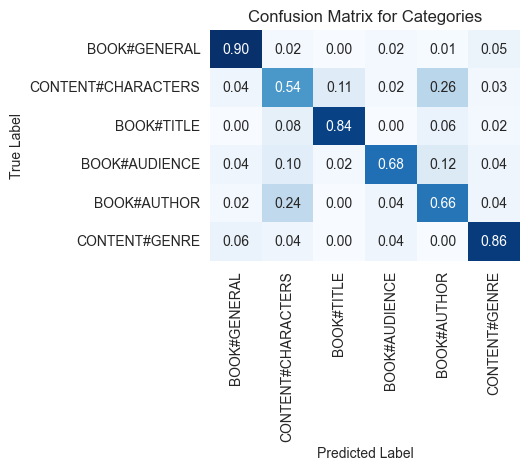

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 'BOOK#GENERAL', 'CONTENT#CHARACTERS', 'BOOK#TITLE', 'BOOK#AUDIENCE', 'BOOK#AUTHOR', 'CONTENT#GENRE'
cm = np.array([[90,  2,  0,  2,  1,  5],   # BOOK#GENERAL
             [4, 54,  11,  2, 26,  3],   # CONTENT#CHARACTERS
             [0,  8, 84,  0,  6,  2],   # BOOK#TITLE
             [4, 10,  2, 68, 12,  4],   # BOOK#AUDIENCE
             [2, 24,  0,  4, 66,  4],   # BOOK#AUTHOR
             [6,  4,  0,  4,  0, 86]])  # CONTENT#GENRE

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['BOOK#GENERAL', 'CONTENT#CHARACTERS', 'BOOK#TITLE', 'BOOK#AUDIENCE', 'BOOK#AUTHOR', 'CONTENT#GENRE'],
            yticklabels=['BOOK#GENERAL', 'CONTENT#CHARACTERS', 'BOOK#TITLE', 'BOOK#AUDIENCE', 'BOOK#AUTHOR', 'CONTENT#GENRE'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Categories')

plt.show()
plt.close()
